# Part II - Loan Data from Prosper Dataset Visualization Presentation
## by Chris Menor

## Investigation Overview


To analyze and understand the financial dynamics of loan data by examining the distribution of credit scores, the relationship between credit scores and loan amounts, and the interplay between key financial variables (credit score, borrower APR, loan amount, and debt-to-income ratio) across different Prosper Ratings.


## Dataset Overview and Executive Summary


The structure of the dataset is 113,937 loans, and each loan has 81 variables. The data is split between borrowers info (income, credit score, etc) and Prosper loan info (loan number, payment amount, etc).

Summary of Findings:

* Distribution of Credit Scores is concentrated in the 600 - 800 range with the average of 685.57. 

* We expect the higher credit score the borrow has, the best APR and Prosper Score will be given on loans.

* Higher credit scores lead to higher loan amounts, but interestingly the highest credit scores have less frequency of the higher loan amounts than you would expect.

* ProsperRating correlates with lower debt-to-income ratio, higher credit rating and borrower APR.



In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [19]:
# load in the dataset into dataframe
dfloan = pd.read_csv('prosperLoanData.csv')

## Visualization 1
The distribution of the frequency of credit scores.

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

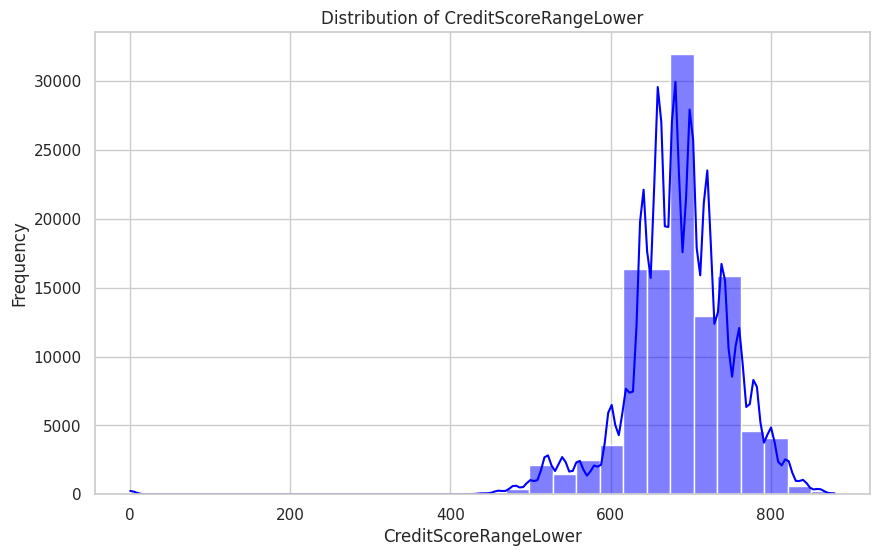

In [20]:
# Create a histogram for credit score
plt.figure(figsize=(10, 6)) 
sns.histplot(dfloan['CreditScoreRangeLower'], bins=30, kde=True, color='blue')  # Plot the histogram with Kernel Density Estimate

# Set the title and labels
plt.title('Distribution of CreditScoreRangeLower') 
plt.xlabel('CreditScoreRangeLower') 
plt.ylabel('Frequency')

# Show the plot
plt.show() 

Frequency of loans are the highest from the 600 - 800 range

## Visualization 2
Relationship Between credit score and loan amount using a Box Plot

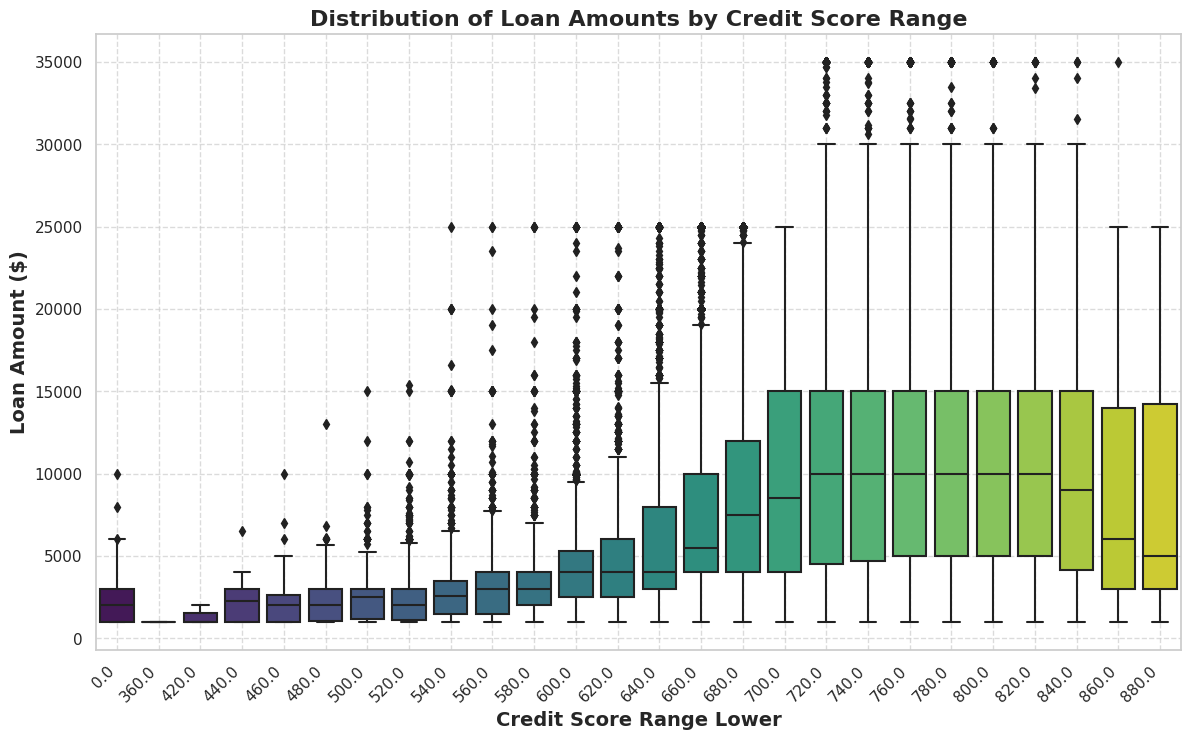

In [21]:
# Create a box plot for loan amount across different credit score ranges
plt.figure(figsize=(14, 8))
sns.boxplot(data=dfloan, x='CreditScoreRangeLower', y='LoanOriginalAmount', palette='viridis')

# Set titles and labels 
plt.title('Distribution of Loan Amounts by Credit Score Range', fontsize=16, weight='bold')
plt.xlabel('Credit Score Range Lower', fontsize=14, weight='bold')
plt.ylabel('Loan Amount ($)', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set the style of the plot for a cleaner look
sns.set(style="whitegrid")

# Show plot
plt.show()


The majority of higher loan amounts are by borrowers with higher credit scores. Interesting note is that the highest credit score do not populate the highest loan amount at a frequency that you may expect.

## Visualization 3

Relationships Between Financial Variables by Prosper Rating



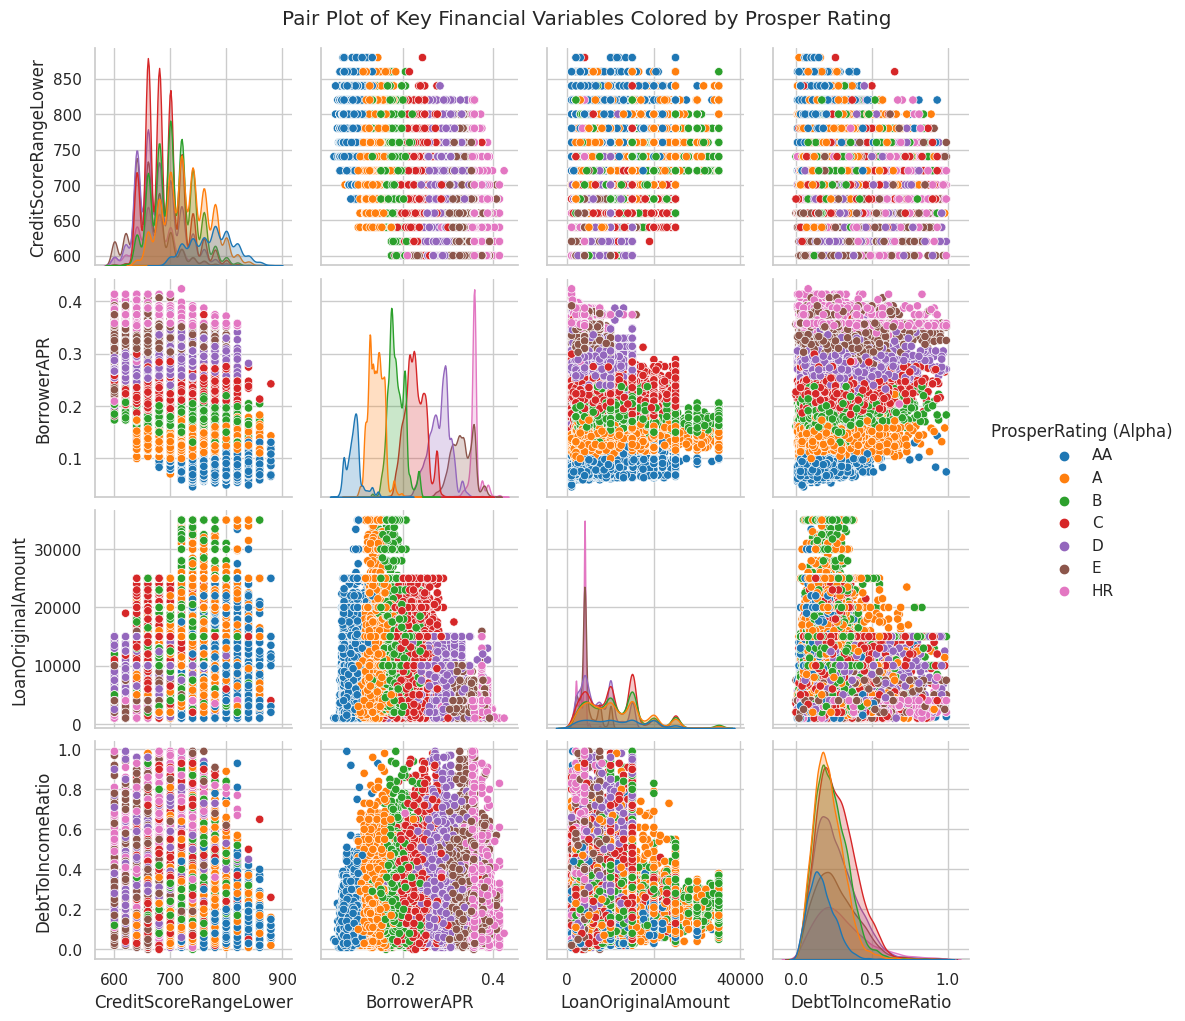

In [22]:
# Pair plot of credit score, BorrowerAPR, loan amount, and Debt-To-Income Ratio

# Filter out rows where DebtToIncomeRatio is 1 or greater
dfloan = dfloan[dfloan['DebtToIncomeRatio'] < 1]

# Reorder the ProsperRating (Alpha) categories
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
dfloan['ProsperRating (Alpha)'] = pd.Categorical(dfloan['ProsperRating (Alpha)'], categories=prosper_rating_order, ordered=True)

# Create the pair plot with the specified order
sns.pairplot(dfloan, vars=['CreditScoreRangeLower', 'BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio'], 
             hue='ProsperRating (Alpha)', palette='tab10', diag_kind='kde', height=2.5)

# Set the title
plt.suptitle('Pair Plot of Key Financial Variables Colored by Prosper Rating', y=1.02)

# Show the plot
plt.show()

High ProsperRating trends with lower APR, debt-to-income ratio and credit score.